In [35]:
#conda install -c anaconda nltk

In [36]:
# import nltk
# nltk.download('punkt')

## 문장, 단어 토큰화

In [9]:
# 문장 토큰화
from nltk import sent_tokenize
text_sample = 'The Matrix is everywhere its all around us, here even in this room.  \
              You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [10]:
# 단어 토큰화
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


## 여러 문장들을, 단어 단위로 토큰화

In [11]:
# 여러 문장들에 대한 단어 토큰화

from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [43]:
# n-grams
from nltk import ngrams
sentence = "The Matrix is everywhere its all around us, here even in this room."

words = word_tokenize(sentence)

all_ngrams = ngrams(words, 2)
ngrams = [ngram for ngram in all_ngrams]
print(len(ngrams),'\n', ngrams)

14 
 [('The', 'Matrix'), ('Matrix', 'is'), ('is', 'everywhere'), ('everywhere', 'its'), ('its', 'all'), ('all', 'around'), ('around', 'us'), ('us', ','), (',', 'here'), ('here', 'even'), ('even', 'in'), ('in', 'this'), ('this', 'room'), ('room', '.')]


### 딥러닝이 발전하면서 nltk는 잘 사용하지 않지만, 이전까진 text분석에서 유용한 툴이었다.
### 여전히 텍스트 데이터 전처리를 위해 필요.

## Stopwords 제거 

In [44]:
# import nltk
# nltk.download('stopwords')

In [45]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
# corpus에서 english stopwords들을 추출해온다
print(nltk.corpus.stopwords.words('english')[:40])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [14]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [15]:
# Stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [17]:
# Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


amuse amuse amuse
happy happy
fancy fancy


## Feature Vectorization

- 모든 단어를 추출하여 feature로 만든다(값을 만든다).
- count기반 vectoriztion은 단어의 빈도수로 값을 만든다.(Bag of Words 모델)

- BOW => Document Term(단어) Matrix

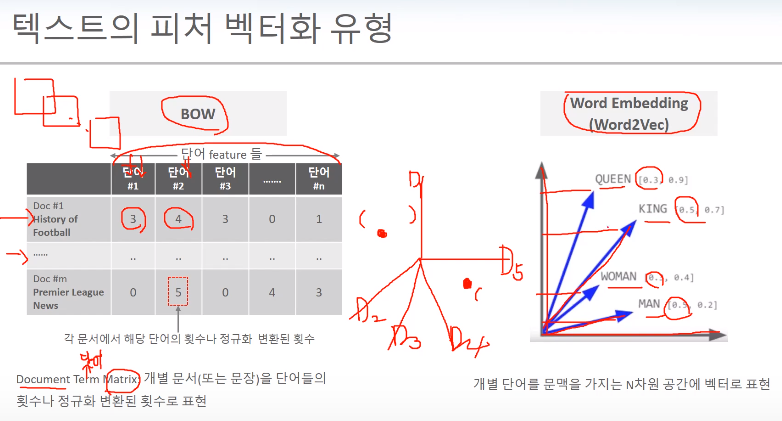

man과 king은 같은 x좌표를 갖듯이, 유사한 위치에 있다고 추론한다

장점:
쉽고 빠른 구축, '예상보다' 문서의 특징을 잘 나타내어 여러분야에서 활용도 높음

단점:
문맥 의미 반영 불가,
희소 행렬 문제(0이 차지하는 메모리문제 발생)

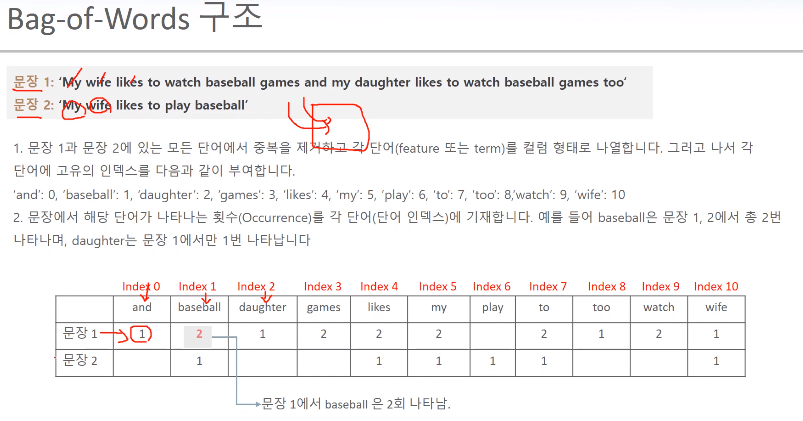

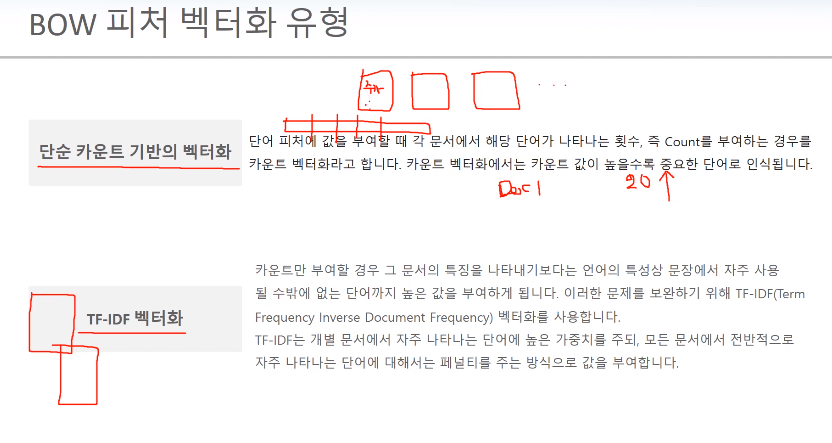

주가, 주식 등의 문서에서는 당연히 '주가''시가'라는 단어가 많이 나올수 밖에 없으니, 카운트기반 방식에서는 유의미한 모델을 만들기 어렵다. 그것을 보완한 것이 TF-IDF

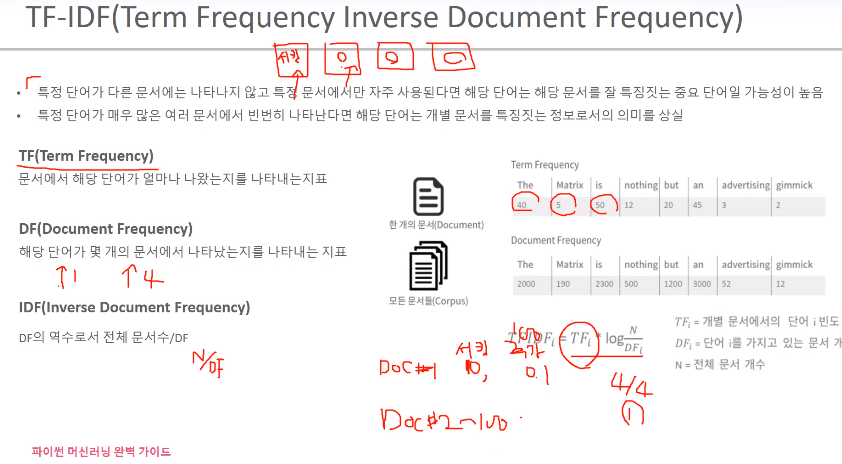

- 문서에서 '주가' 같은 단어는 자주 나오니까 위 식을 적용하면 로그값이 0으로 수렴해 중요도가 낮게 나오지만, '서킷브레이커'같은 단어는 로그값이 유지되기 때문에 어느정도의 중요성을 가지는 것으로 나올 수 있다.

# 사이킷런 CountVectorizer 초기화 파라미터

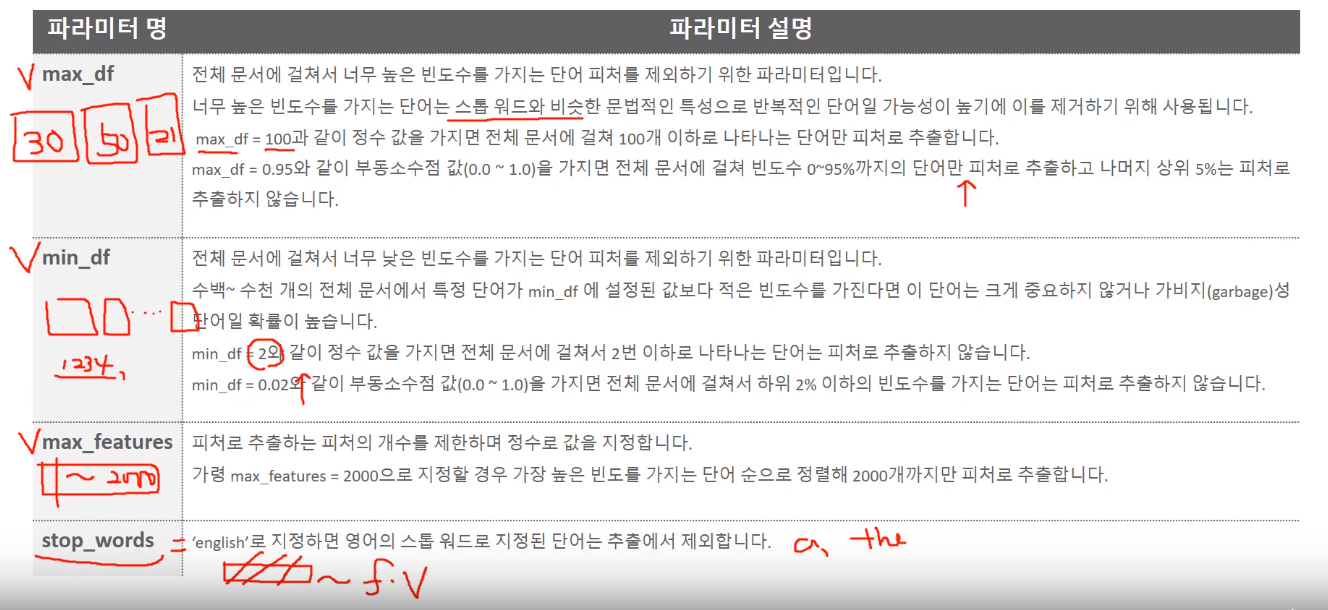

In [46]:
text_sample_01 = 'The Matrix is everywhere its all around us, here even in this room.\
                  You can see it out your window or on your television.\
                  You feel it when you go to work, or go to church or pay your taxes.'
text_sample_02 = 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe\
                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'
text=[]
text.append(text_sample_01); text.append(text_sample_02)
print(text,"\n", len(text))

['The Matrix is everywhere its all around us, here even in this room.                  You can see it out your window or on your television.                  You feel it when you go to work, or go to church or pay your taxes.', 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'] 
 2


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(text)
# max_df = 1.0은 피쳐링 안한다는 뜻

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
ftr_vect = cnt_vect.transform(text)
# 피쳐 객체화된 것을 frt_vect로 반환

In [26]:
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)
# 아래는, 각각의 단어들의 위치를 반환한다.

<class 'scipy.sparse.csr.csr_matrix'> (2, 201)
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 25)	1
  (0, 26)	1
  (0, 27)	1
  (0, 28)	1
  (0, 29)	1
  (0, 30)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	1
  (0, 46)	2
  (0, 47)	2
  (0, 48)	1
  (0, 49)	1
  :	:
  (1, 156)	1
  (1, 157)	1
  (1, 158)	1
  (1, 159)	1
  (1, 160)	1
  (1, 161)	1
  (1, 168)	1
  (1, 169)	1
  (1, 170)	1
  (1, 174)	7
  (1, 175)	1
  (1, 176)	1
  (1, 183)	1
  (1, 184)	1
  (1, 185)	1
  (1, 186)	1
  (1, 187)	2
  (1, 188)	2
  (1, 189)	1
  (1, 190)	1
  (1, 191)	1
  (1, 192)	1
  (1, 193)	1
  (1, 194)	1
  (1, 195)	1


In [28]:
print(cnt_vect.vocabulary_)

{'the': 129, 'matrix': 77, 'is': 66, 'everywhere': 40, 'its': 74, 'all': 0, 'around': 11, 'us': 150, 'here': 51, 'even': 37, 'in': 59, 'this': 140, 'room': 106, 'you': 174, 'can': 25, 'see': 109, 'it': 69, 'out': 90, 'your': 193, 'window': 165, 'or': 83, 'on': 80, 'television': 126, 'feel': 43, 'when': 162, 'go': 46, 'to': 143, 'work': 171, 'church': 28, 'pay': 93, 'taxes': 125, 'the matrix': 132, 'matrix is': 78, 'is everywhere': 67, 'everywhere its': 41, 'its all': 75, 'all around': 1, 'around us': 12, 'us here': 151, 'here even': 52, 'even in': 38, 'in this': 60, 'this room': 141, 'room you': 107, 'you can': 177, 'can see': 26, 'see it': 110, 'it out': 70, 'out your': 91, 'your window': 199, 'window or': 166, 'or on': 86, 'on your': 81, 'your television': 197, 'television you': 127, 'you feel': 179, 'feel it': 44, 'it when': 72, 'when you': 163, 'you go': 181, 'go to': 47, 'to work': 148, 'work or': 172, 'or go': 84, 'to church': 146, 'church or': 29, 'or pay': 88, 'pay your': 94, '

In [30]:
cnt_vect = CountVectorizer(max_features=5, stop_words='english')
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 5)
{'window': 4, 'pill': 1, 'wake': 2, 'believe': 0, 'want': 3}


### ngram_range 확인

In [49]:
cnt_vect = CountVectorizer(ngram_range=(1,1))
# default로 1도 하고, 3도해라.
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 51)
{'the': 38, 'matrix': 22, 'is': 19, 'everywhere': 11, 'its': 21, 'all': 0, 'around': 2, 'us': 41, 'here': 15, 'even': 10, 'in': 18, 'this': 39, 'room': 30, 'you': 49, 'can': 6, 'see': 31, 'it': 20, 'out': 25, 'your': 50, 'window': 46, 'or': 24, 'on': 23, 'television': 37, 'feel': 12, 'when': 45, 'go': 13, 'to': 40, 'work': 48, 'church': 7, 'pay': 26, 'taxes': 36, 'take': 35, 'blue': 5, 'pill': 27, 'and': 1, 'story': 34, 'ends': 9, 'wake': 42, 'bed': 3, 'believe': 4, 'whatever': 44, 'want': 43, 'red': 29, 'stay': 33, 'wonderland': 47, 'show': 32, 'how': 17, 'deep': 8, 'rabbit': 28, 'hole': 16, 'goes': 14}


# 희소행렬의 이해

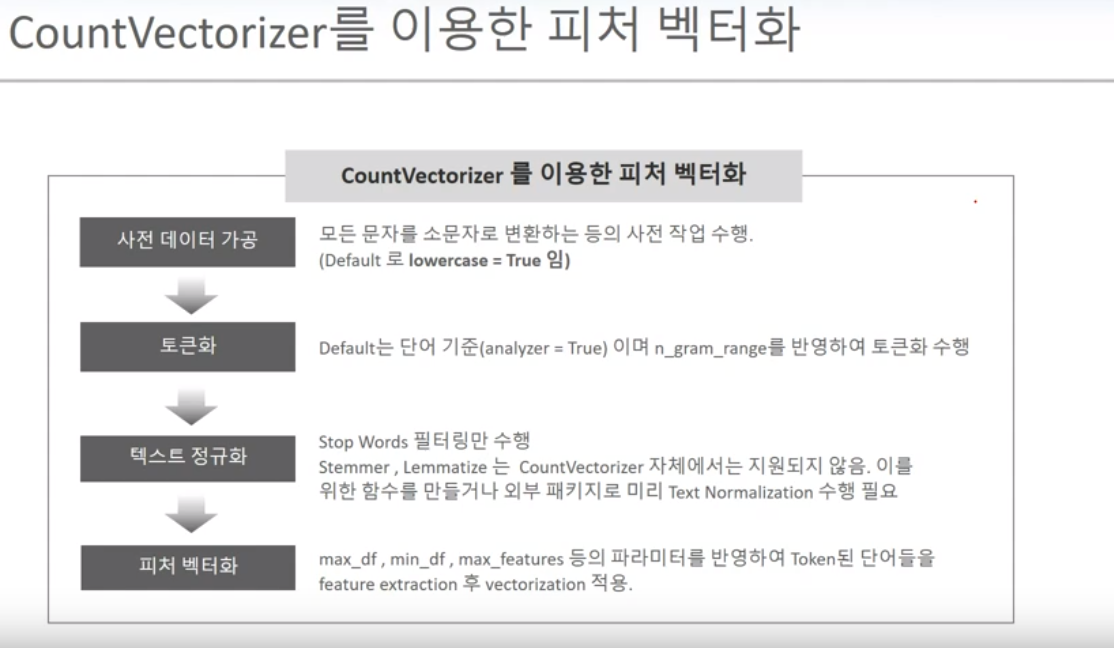
- 피처 벡터화까지 마친 후 희소행렬 처리진행

### 희소행렬은 BOW feature vectorization에선 나올 수 밖에 없어. 
- 모든 단어들을 나열하기 때문. 개별 문서가 해당 단어를 가질 확률은 극히 일부(개별 문서가 사전이 아닌 이상).
- 그로 인해 메모리공간에 많은 0이 할당되기에, COO,CSR형식으로 변환한다.

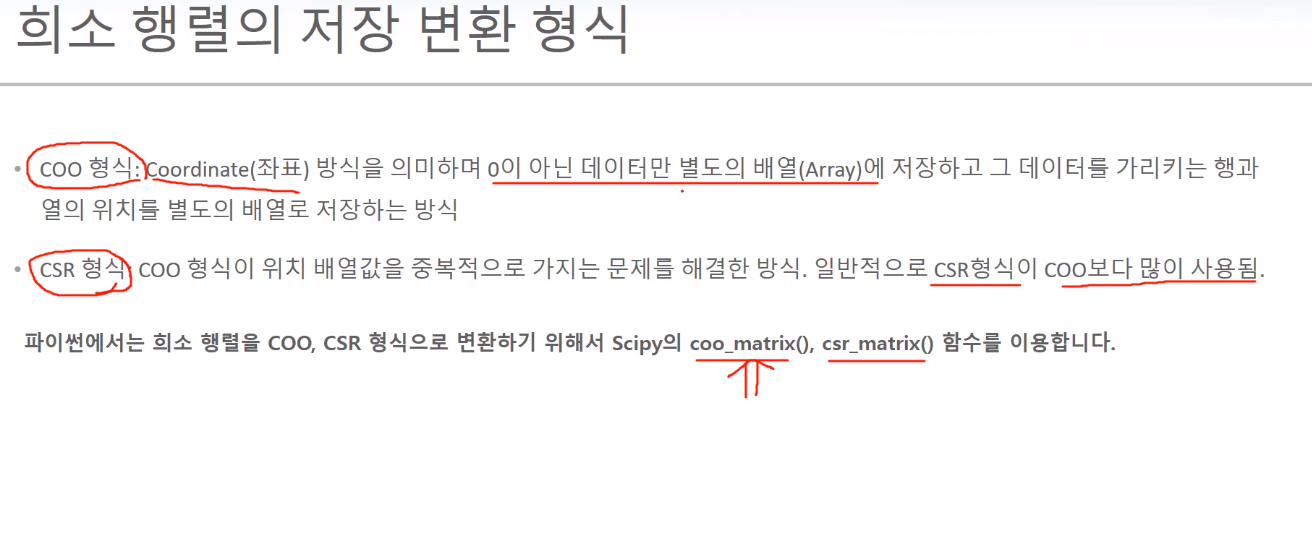

- 이런 함수가 있다~ 상식선으로 알고 있으셈

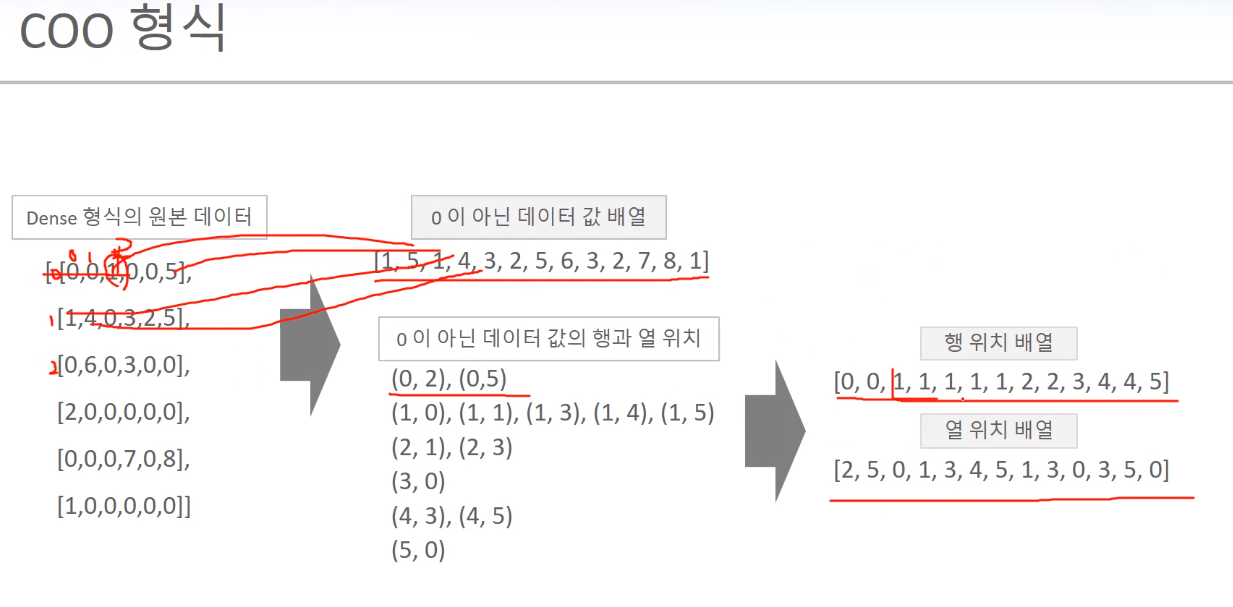
- 행위치배열에서 중복값이 나오기에, 메모리를 많이 잡아먹는 단점이 존재

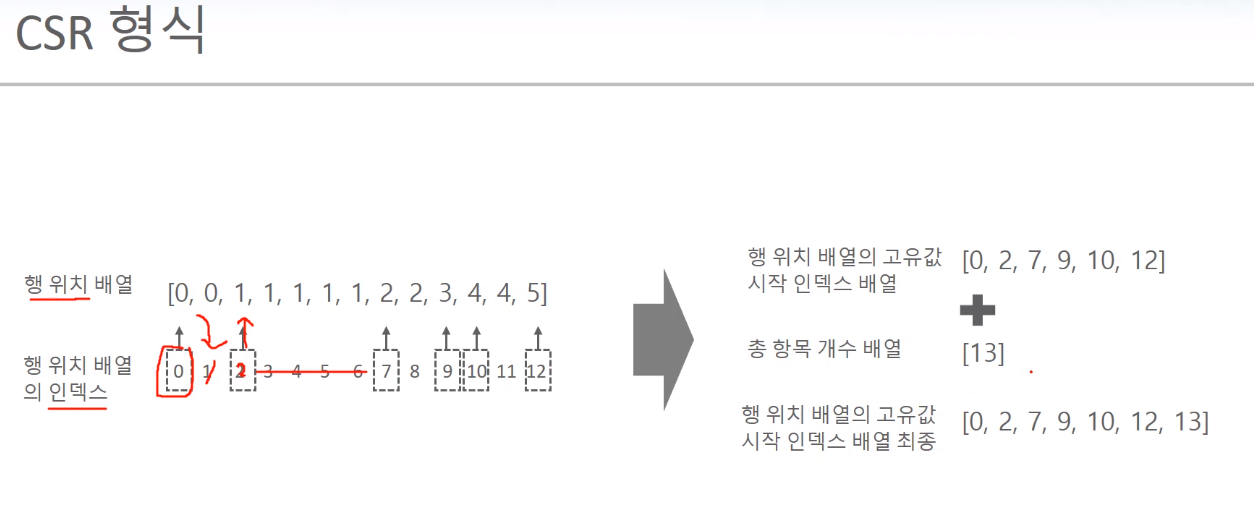
- 중복되는 두번째 인자부터 다른 방식으로 저장한다.
- 더 이상 안온다는 의미로 12 뒤에 13을 박아둔다(일종의 terminating sign). 13을 안 박아두면, 12 뒤로 데이터가 더 추가 될 수 도 있다.
- COO 보다 메모리를 훨씬 절약할 수 있다.

### 희소행렬-COO 형식

In [1]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], 
                    [0, 2, 0 ] ] )


In [2]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [3]:
print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray() # 원본 형식으로 반환하는 것

print(type(dense01),"\n", dense01)

<class 'scipy.sparse.coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


### 희소행렬-CSR 형식

In [4]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [5]:
print(sparse_csr)


  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [7]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 위는 그냥 과정을 보여준 것이고, 아래 메소드는 알아서 간단하게 matrix형태로 바꿔준다
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [11]:
print(coo)
print('\n')
print(csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
